In [35]:
import numpy as np

def f(x):
    return 3 + 2 * x[0] - x[1] + 4 * x[0]**2

def compute(x, beta):
    return x @ beta

# точки (x1, x2)
points = np.array([
    [0.,  0.],
    [1.,  0.],
    [0.,  1.],
    [-1., 2.],
    [2., -1.]
])

# строим матрицу признаков [1, x1, x2, x1^2, x2^2]
X = np.array([
    [1., x1, x2, x1**2, x2**2] for x1, x2 in points
])

# целевые значения y — по исходной f(x)
y = np.array([f(p) for p in points])

# обучаем модель
beta = np.linalg.pinv(X) @ y
print(compute(X[3], beta))
for p, x in zip(points, X):
    print(f(p), compute(x, beta))

# проверка
print("beta =", np.round(beta, 6))
print("MSE  =", np.mean((y - X @ beta)**2))


3.000000000000007
3.0 3.00000000000001
9.0 9.000000000000004
2.0 2.0000000000000067
3.0 3.000000000000007
24.0 23.999999999999996
beta = [ 3.    2.25 -1.25  3.75  0.25]
MSE  = 4.488618550707557e-29


In [36]:
y_pred = X @ beta
print("MSE =", np.mean((y - y_pred)**2))
print("cond =", np.linalg.cond(X.T @ X))


MSE = 4.488618550707557e-29
cond = 4.474789562185706e+17


In [59]:
#точки
points = np.array([
    [-2.0, -2.0],
    [-1.0,  1.0],
    [ 0.0,  0.0],
    [ 1.0, -1.0],
    [ 2.0,  2.0],
    [ 3.0, -2.0],
    [-3.0, 1.5]
])

y = np.array([
    9.0,
    0.0,
    3.0,
    6.0,
    13.0,
    14.0,
    0.
])


def make_X(points):
    return np.array([[1., row[0], row[1], row[0] * row[0], row[1] * row[1], row[0] * row[1]] for row in points])

X = make_X(points)
beta = np.linalg.pinv(X) @ y
print(beta)
# тестовые точки (x1, x2)
test_points = np.array([
    [1.5, -1.0],
    [-1.5, 2.0],
    [0.5, 1.5]
])

# значения функции в этих точках
test_y = np.array([
    7.75,
    -2.75,
    3.5
])

for target, x in zip(test_y, make_X(test_points)):
    print(compute(x, beta), target)

[ 3.00000000e+00  2.00000000e+00 -1.00000000e+00  1.00000000e+00
  1.77635684e-15  1.00000000e+00]
7.7499999999999964 7.75
-2.7499999999999973 -2.75
3.4999999999999982 3.5


In [57]:
import numpy as np

def f(x):
    return 3 + 2 * x[0] - x[1] + x[0]**2 + x[0] * x[1]

# исходные точки
points = np.array([
    [-2.0, -2.0],
    [-1.0,  1.0],
    [ 0.0,  0.0],
    [ 1.0, -1.0],
    [ 2.0,  2.0],
    [ 3.0, -2.0],
    [-3.0, 1.5]
])


# значения функции
y = np.array([f(p) for p in points])

# строим X
def make_X(points):
    return np.array([
        [1, x1, x2, x1**2, x2**2, x1 * x2] for x1, x2 in points
    ])

X = make_X(points)
beta, *_ = np.linalg.lstsq(X, y, rcond=None)

print("beta =", np.round(beta, 6))

# тестовые точки
test_points = np.array([
    [1.5, -1.0],
    [-1.5, 2.0],
    [0.5, 1.5]
])
test_y = np.array([f(p) for p in test_points])

# проверка
for x, y_true in zip(test_points, test_y):
    x_features = make_X([x])[0]
    y_pred = x_features @ beta
    print("pred =", y_pred, "  true =", y_true)
print(y)

beta = [ 3.  2. -1.  1. -0.  1.]
pred = 7.750000000000005   true = 7.75
pred = -2.750000000000011   true = -2.75
pred = 3.4999999999999973   true = 3.5
[ 9.  0.  3.  6. 13. 14.  0.]


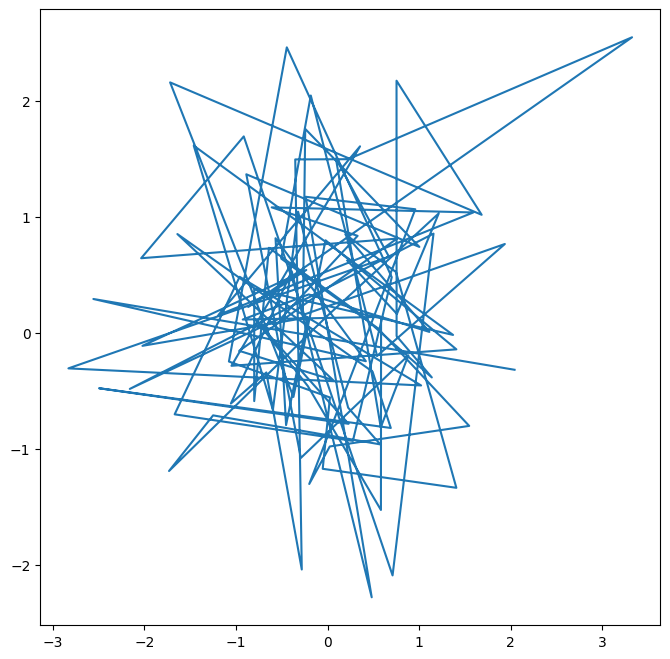

In [69]:
from matplotlib.pyplot import subplots
rng = np.random.default_rng(3)
fig, ax = subplots(figsize=(8, 8))
x = rng.standard_normal(100)
y = rng.standard_normal(100)
ax.plot(x, y);

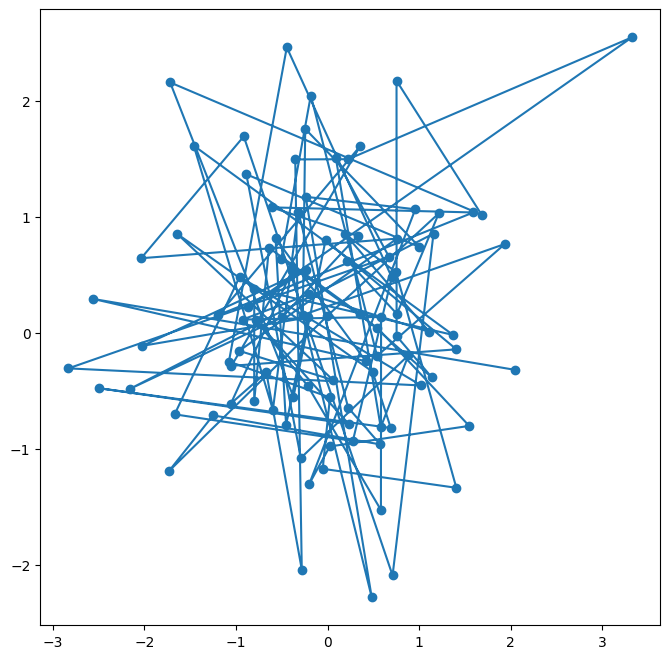

In [77]:
fig, ax = subplots(figsize=(8, 8))
ax.plot(x, y, marker='o');

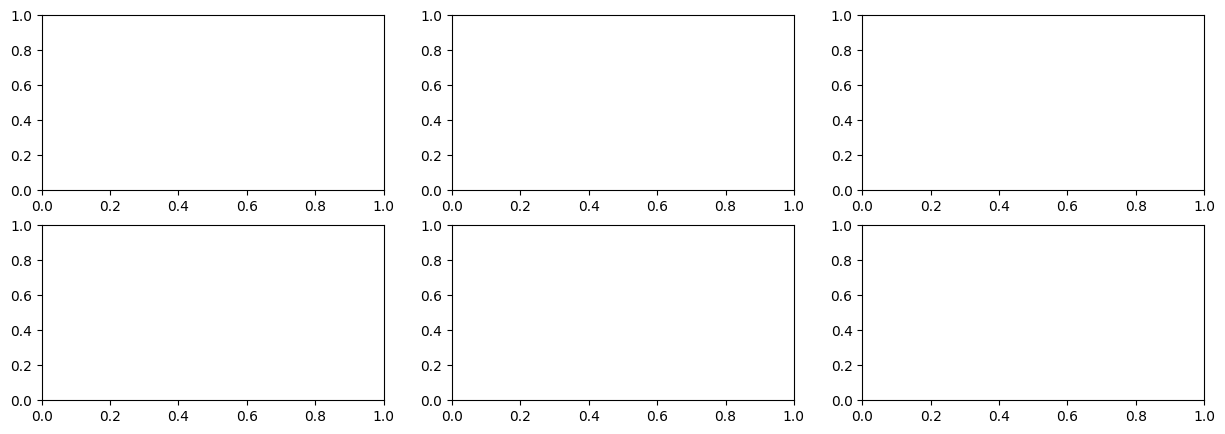

In [81]:
fig, axes = subplots(nrows=2,
ncols=3,
figsize=(15, 5))

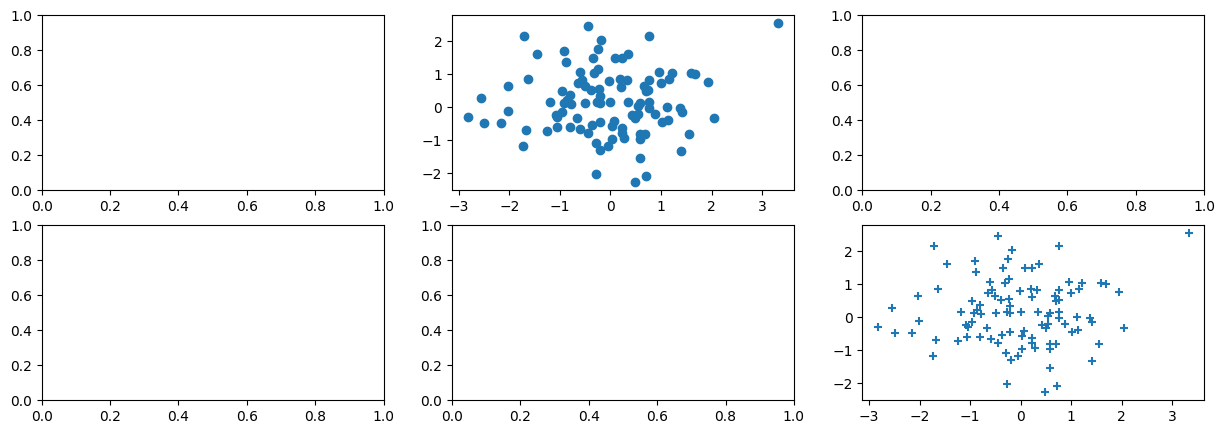

In [82]:
axes[0,1].plot(x, y, 'o')
axes[1,2].scatter(x, y, marker='+')
fig

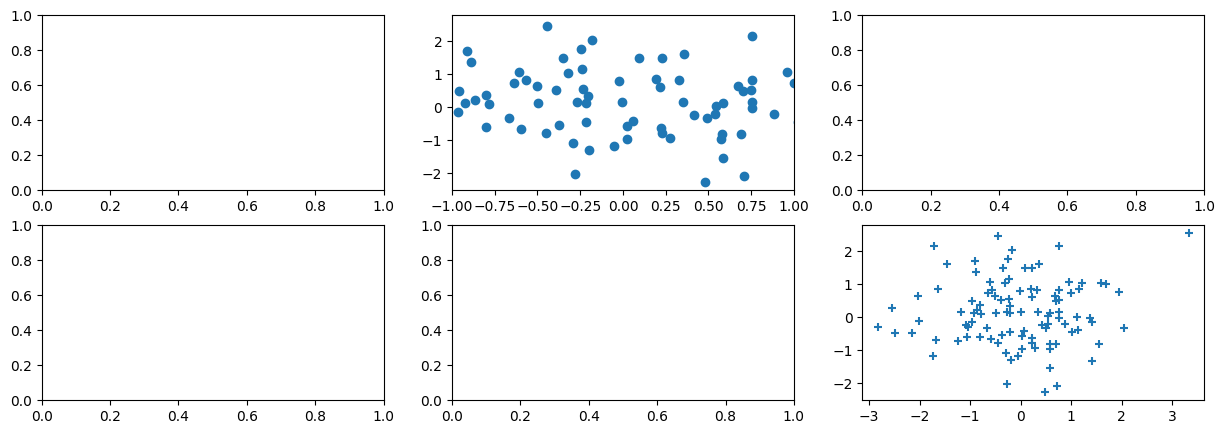

In [84]:
axes[0,1].set_xlim([-1,1])
fig

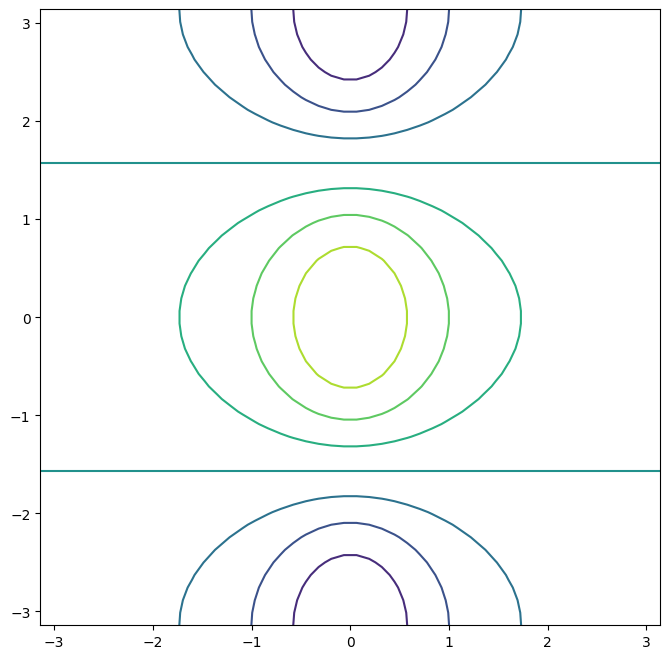

In [86]:
fig, ax = subplots(figsize=(8, 8))
x = np.linspace(-np.pi, np.pi, 50)
y = x
f = np.multiply.outer(np.cos(y), 1 / (1 + x**2))
ax.contour(x, y, f);

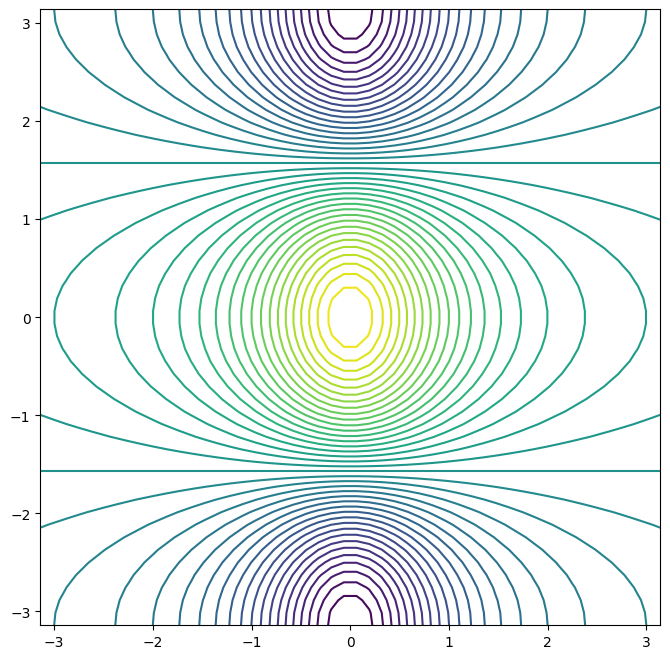

In [87]:
fig, ax = subplots(figsize=(8, 8))
ax.contour(x, y, f, levels=45);

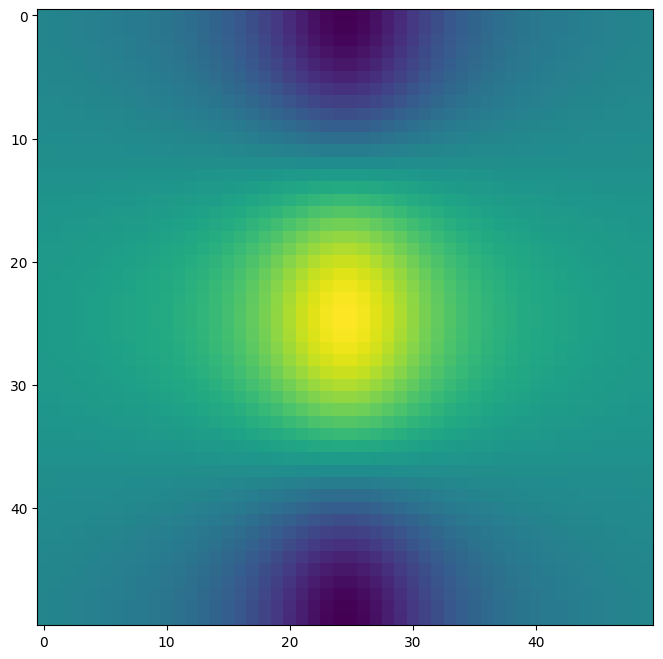

In [88]:
fig, ax = subplots(figsize=(8, 8))
ax.imshow(f);